In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
path = 'D:\Machine Learning - Course\Sample Data Sets\Sales_Data'
files = [file for file in os.listdir(path)]
df = pd.DataFrame()

for file in files:
    ddf=pd.read_csv(path+'/'+file)
    df=pd.concat([df,ddf])

In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
df.loc[df['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Removing additional Headers 

In [5]:
df.drop(df.loc[df['Order ID']== 'Order ID'].index,axis=0,inplace=True)

In [6]:
df.shape

(183270, 6)

In [7]:
df.isnull().sum()

Order ID            537
Product             537
Quantity Ordered    537
Price Each          537
Order Date          537
Purchase Address    537
dtype: int64

In [8]:
df.loc[df['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [11]:
df.dropna(axis=0,how='all',inplace=True) #Removing all NAN values where each values is blank.

In [12]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Stregnthing a data with adding some new columns 

## Add Month 

In [14]:
df['Month']=df['Order Date'].str[0:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## Creating a formula which will translate month numbers into string format. 

In [34]:
def imput_month(col):
    mnth = col[0] 
    if mnth == '01':
        return 'January'
    elif mnth == '02':
        return 'February'
    elif mnth == '03':
        return 'March'
    elif mnth == '04':
        return 'April'
    elif mnth == '05':
        return 'May'
    elif mnth == '06':
        return 'June'
    elif mnth == '07':
        return 'July'
    elif mnth == '08':
        return 'August'
    elif mnth == '09':
        return 'September'
    elif mnth == '10':
        return 'October'
    elif mnth == '11':
        return 'November'
    elif mnth == '12':
        return 'December'
    else:
        return mnth
df['Month'] = df[['Month']].apply(imput_month,axis=1)

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April


In [45]:
df.groupby('Month').count()['Order ID'].sort_values()

Month
January       9500
September    11375
August       11719
February     11726
June         13293
July         14032
March        14888
May          16284
November     17281
April        17982
October      19973
December     24680
Name: Order ID, dtype: int64

In December month sales was highest!

In [47]:
df.groupby('Month').sum()['Quantity Ordered'].sort_values()

Month
June         1111111111111111111111131111111211111211111111...
March        1111111111111111211211111151211111111131111111...
September    1111111111114211111111131111111111111121111111...
May          1111111111211111111111111111111121111111111111...
December     1111111214212211111111411111112111111211121111...
February     1111211111111111111211111112411121111211111111...
July         1111511111111111211111112112112111111111111121...
October      1121111111111111111111111111111111111111121131...
January      1121411111111111111111111111311112112111111111...
November     1211111111111111111311111121111111111111211111...
April        2111111111111111111111111112111211111112131121...
August       2112211111111111111111111111121111131211112111...
Name: Quantity Ordered, dtype: object

# Data Cleansing - By adding ceratin new columns 

In [52]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [56]:
df.groupby('Month').sum()['Sales'].sort_values()

Month
January      1.786308e+06
September    2.049840e+06
February     2.160539e+06
August       2.192498e+06
June         2.528721e+06
July         2.585514e+06
March        2.753653e+06
May          3.103832e+06
November     3.148903e+06
April        3.337287e+06
October      3.678994e+06
December     4.558769e+06
Name: Sales, dtype: float64

## Adding Zip Code 

In [58]:
df['Zipcode'] = df['Purchase Address'].apply(lambda x: x.split(',')[2])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Zipcode
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,MA 02215
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,CA 90001
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,CA 90001
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,8.97,CA 90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,CA 94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,700.00,CA 94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,379.99,CA 94016


## Adding City 

In [61]:
def get_city(add):
    city =add[0]
    return city.split(',')[1]

df['City'] = df[['Purchase Address']].apply(get_city,axis=1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Zipcode,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,TX 75001,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,MA 02215,Boston
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,CA 90001,Los Angeles
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,CA 90001,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,CA 90001,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,8.97,CA 90001,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,CA 94016,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,700.00,CA 94016,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,379.99,CA 94016,San Francisco


In [62]:
df['City'].value_counts()

 San Francisco    43943
 Los Angeles      29114
 New York City    24451
 Boston           19589
 Atlanta          14626
 Dallas           14560
 Seattle          14477
 Portland         12251
 Austin            9722
Name: City, dtype: int64

In [63]:
df['Zipcode'].value_counts()

 CA 94016    43943
 CA 90001    29114
 NY 10001    24451
 MA 02215    19589
 GA 30301    14626
 TX 75001    14560
 WA 98101    14477
 OR 97035     9838
 TX 73301     9722
 ME 04101     2413
Name: Zipcode, dtype: int64

# Data Visualization 

## Univariate Analysis 

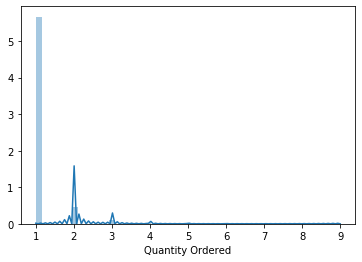

In [66]:
sns.distplot(df['Quantity Ordered'],kde=True)

In [67]:
df['Quantity Ordered'].value_counts()

1    165654
2     13075
3      2874
4       788
5       230
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

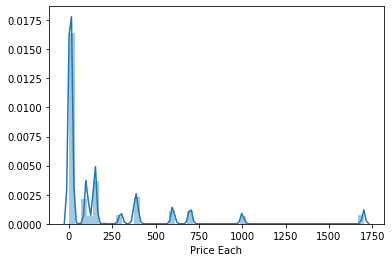

In [69]:
sns.distplot(df['Price Each'],kde=True)

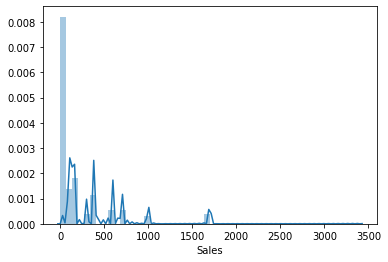

In [75]:
sns.distplot(df['Sales'],kde=True)

# Bivariate Analysis 

In [70]:
df.corr()

,Quantity Ordered,Price Each,Sales
Quantity Ordered,1.000000,-0.148109,-0.139259
Price Each,-0.148109,1.000000,0.999199
Sales,-0.139259,0.999199,1.000000


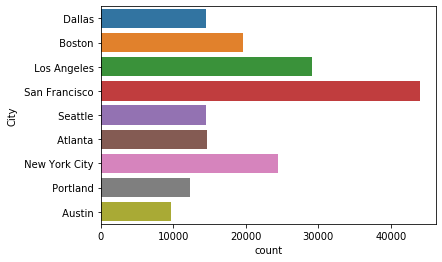

In [73]:
sns.countplot(y='City',data=df)

This means that San Francisco has a maximum no. of orders ordered in this sale data.

In [197]:
cd = df.groupby('City').sum()[['Price Each','Sales']].sort_values('Sales').reset_index()

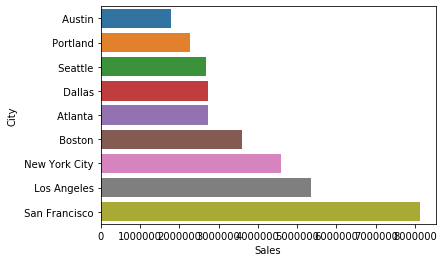

In [198]:
sns.barplot(y='City',x='Sales',data=cd)

It seems that San francisco has a maximum no. of Sales.

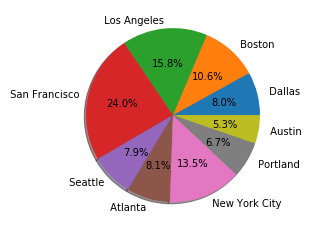

In [99]:
city = list(df['City'].unique())
Sales = []
for i in city:
    val = df.loc[df['City']==i].sum()['Sales']
    Sales.append(val)
plt.pie(x=Sales,labels = city,autopct='%1.1f%%',shadow=True)
plt.show()

In [189]:
sd = df.groupby('Month').sum()[['Sales','Price Each']].sort_values('Sales').reset_index()

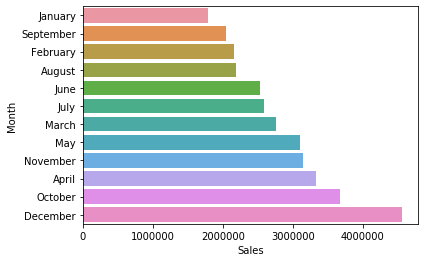

In [190]:
sns.barplot(x='Sales',y='Month',data=sd)

In [180]:
newdf = df.groupby('Product').mean()[['Price Each','Sales']].sort_values('Sales').reset_index()

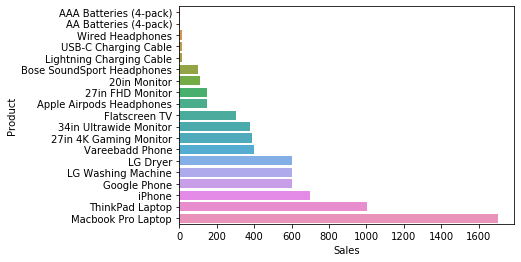

In [181]:
sns.barplot(y='Product',x='Sales',data = newdf)

It means Macbook Pro Laptop has a maximum amount of sales in this sales data.

In [104]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [105]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Sales                      float64
Zipcode                     object
City                        object
dtype: object

## Getting Hour & Time from order Date

In [106]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Zipcode,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,TX 75001,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,MA 02215,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,CA 90001,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,CA 90001,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,CA 90001,Los Angeles


In [108]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [177]:
hrs_summ = df.groupby('Hour').sum()[['Sales','Price Each']].reset_index()

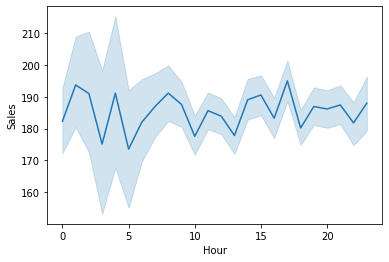

In [154]:
sns.lineplot(x='Hour',y='Sales',data=df)

It means most of the sales occured in early morning at 4 am & then again shoots at 4 Pm.

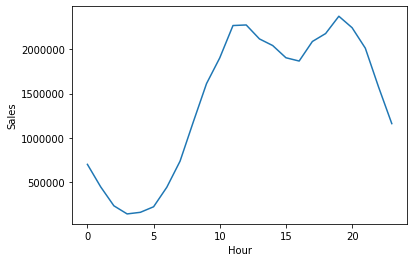

In [176]:
sns.lineplot(x='Hour',y='Sales',data=hrs_summ)